In [1]:
%pylab inline
from scipy.stats import circmean

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Function definition
def Velocity(Vvec,L):
    V0=Vvec[-2]
    V1=Vvec[-1]
    max0=argmax(V0)
    max1=argmax(V1)
    if max1 < max0:
        max1=max1+len(V0)
    v=L*(max1-max0)/len(V0)
    return v

def circular_mean(weights, angles):
    x = y = 0.
    for angle, weight in zip(angles, weights):
        x += math.cos(math.radians(angle)) * weight
        y += math.sin(math.radians(angle)) * weight

    mean = math.degrees(math.atan2(y, x))
    return mean

def center_of_mass(V,pfc,L):
    #index=(pfc*N/L).astype(int)
    #sortedV=V[np.argsort(index)]
    phases=pfc*2*math.pi/L
    m=circular_mean(V,phases)*L/(2*math.pi)
    return m

def sortV(V,pfc,N,L):
    index=(pfc*N/L).astype(int)
    sortedV=V[np.argsort(index)]
    return V

def robustVelocity(Vvec,pfc,L):
    V0=Vvec[2]
    V1=Vvec[3]
    m0=center_of_mass(V0,pfc,L)
    m1=center_of_mass(V1,pfc,L)
    if m1 < m0:
        m1=m1+L
    v=(m1-m0)
    return v

# trajectory dependent velocity
def sortedVelocity(Vvec,pfc,N,L):
    
    index=(pfc*N/L).astype(int)
    V0=Vvec[2]
    sortedV0=V0[np.argsort(index)]
    V1=Vvec[3]
    sortedV1=V1[np.argsort(index)]
    
    max0=argmax(sortedV0)
    max1=argmax(sortedV1)
    if max1 < max0:
        max1=max1+len(sortedV0)
    v=L*(max1-max0)/len(sortedV0)
    return v

# Dependence of the speed on the coding level f

In [3]:
# Load data
pfc=load("f_dependence/pfc.npy")
fs=load("f_dependence/fs.npy")
gammas=load("f_dependence/gammas.npy")
Vs=load("f_dependence/Vdynamics.npy")
Js=[]
for i in range(len(gammas)):
    ji=load("f_dependence/J"+str(i+1)+".npy")
    Js.append(ji)
L=10
N=1000

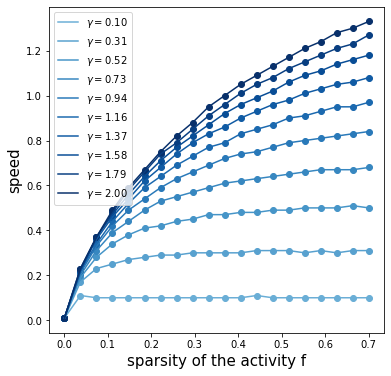

In [4]:
speeds=np.zeros((len(gammas),len(fs)))

figure(figsize=(6,6))
xlabel("sparsity of the activity f",fontsize=15)
ylabel("speed", fontsize=15)
color=cm.Blues(np.linspace(0.5,1,len(gammas)))
for i in range(len(gammas)):
    for j in range(len(fs)):
        speeds[i][j]=Velocity(Vs[i][j],L)
    scatter(fs ,speeds[i],color=color[i])
    plot(fs,speeds[i], label=r"$\gamma=$"+"{:.2f}".format(gammas[i]),color=color[i])

legend()
#savefig("f_dependence.png")




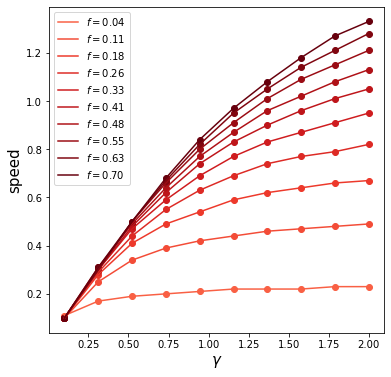

In [5]:
speeds=np.zeros((len(fs),len(gammas)))
fs1=fs
figure(figsize=(6,6))
xlabel(r"$\gamma$",fontsize=15)
ylabel("speed", fontsize=15)
color=cm.Reds(np.linspace(0.5,1,len(fs1)))
for i in range(1,len(fs1))[::2]:
    for j in range(len(gammas)):
        speeds[i][j]=Velocity(Vs[j][i],L)
    scatter(gammas,speeds[i],color=color[i])
    plot(gammas,speeds[i], label=r"$f=$"+"{:.2f}".format(fs1[i]),color=color[i])

legend()
#savefig("gamma_dependence.png")

In [6]:
# curvefit with non linear least squares (curve_fit function)
import numpy as np
from scipy.optimize import curve_fit

def func(x,a,b,c,d,e):
    gamma=x[0]
    f=x[1]
    return a*(gamma)*(f)/((b*gamma+c*f+d*gamma*f +e*gamma*(f**2)))


X1, X2 = np.meshgrid(gammas,fs)
size = X1.shape
x1_1d = X1.reshape((1, np.prod(size)))
x2_1d = X2.reshape((1, np.prod(size)))
xdata = np.vstack((x1_1d, x2_1d))

speeds=np.zeros((len(fs),len(gammas)))
for i in range(len(fs)):
    for j in range(len(gammas)):
        speeds[i][j]=Velocity(Vs[j][i],L)
        

ydata = speeds.reshape(xdata.shape[1])
popt, pcov = curve_fit(func, xdata, ydata)

z_fit = func(xdata, *popt)
Z_fit = z_fit.reshape(size)

print("fit parameters:")
print(popt)

fit parameters:
[ 1.05118963  0.15938036  0.84149853  0.24581246 -0.16424275]


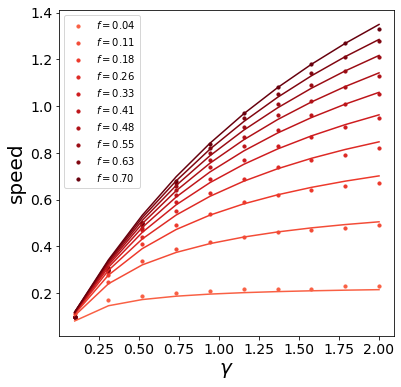

In [7]:
speeds=np.zeros((len(fs),len(gammas)))
fs1=fs
figure(figsize=(6,6))
xlabel(r"$\gamma$",fontsize=20)
ylabel("speed", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

color=cm.Reds(np.linspace(0.5,1,len(fs1)))
for i in range(1,len(fs1))[::2]:
    for j in range(len(gammas)):
        speeds[i][j]=Velocity(Vs[j][i],L)
    scatter(gammas,speeds[i],color=color[i],s=10,label=r"$f=$"+"{:.2f}".format(fs1[i]))
    plot(gammas,Z_fit[i],color=color[i])

legend()
#savefig("speed_gamma_dependence_simulations.svg")